<!-- KNN Classification
Decision Tree Classification
Support Vector Machine
Random Forest
Gaussian Naive Bayes
Stochastic Gradient Descent
Linear SVC -->

In [59]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import preprocessing
import os
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
import warnings
warnings.filterwarnings("ignore")
sns.set_style(style="whitegrid")

In [60]:
data = pd.read_csv('drug200.csv')
data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [62]:
data.isnull()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
195,False,False,False,False,False,False
196,False,False,False,False,False,False
197,False,False,False,False,False,False
198,False,False,False,False,False,False


In [63]:
data.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [64]:
data.isnull()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
195,False,False,False,False,False,False
196,False,False,False,False,False,False
197,False,False,False,False,False,False
198,False,False,False,False,False,False


datam.isnull().sum()

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [66]:
data.corr()

,Age,Na_to_K
Age,1.000000,-0.063119
Na_to_K,-0.063119,1.000000


In [67]:
data.corr()

,Age,Na_to_K
Age,1.000000,-0.063119
Na_to_K,-0.063119,1.000000


In [68]:
data['Sex'].value_counts()

M    104
F     96
Name: Sex, dtype: int64

In [69]:
df = pd.DataFrame(data.groupby(['Sex','Drug'])['Drug'].count())
df

Drug
Sex Drug       
F   DrugY    47
    drugA     9
    drugB     6
    drugC     7
    drugX    27
M   DrugY    44
    drugA    14
    drugB    10
    drugC     9
    drugX    27

<AxesSubplot:xlabel='Sex', ylabel='count'>

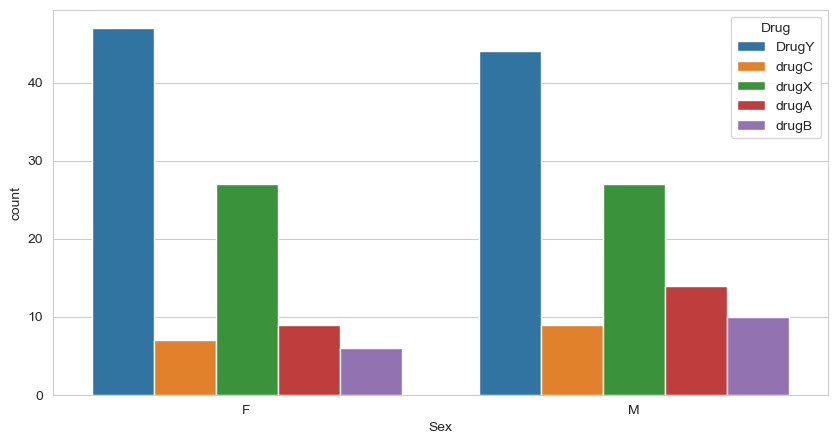

In [70]:
sns.countplot(x='Sex', hue='Drug', data=data)

In [71]:
data['BP'].value_counts()

HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64

In [72]:
df = pd.DataFrame(data.groupby(['BP','Drug'])['Drug'].count())
df

Drug
BP     Drug       
HIGH   DrugY    38
       drugA    23
       drugB    16
LOW    DrugY    30
       drugC    16
       drugX    18
NORMAL DrugY    23
       drugX    36

<AxesSubplot:xlabel='BP', ylabel='count'>

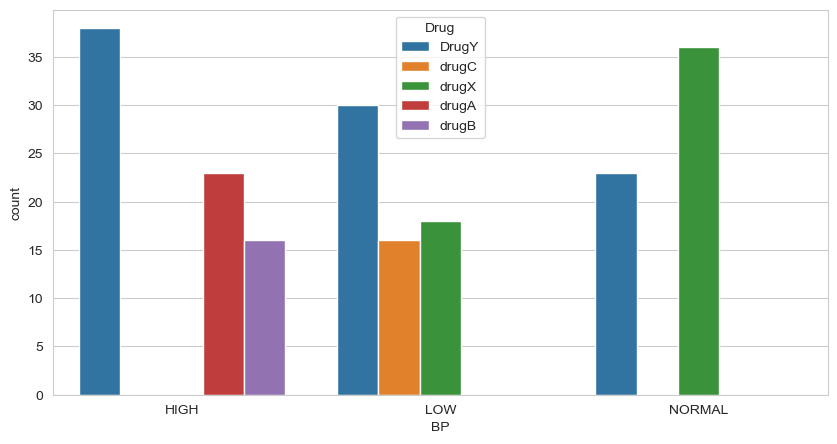

In [73]:
sns.countplot(x='BP', hue='Drug', data=data)

In [74]:
data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [75]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [76]:
X = data.drop("Drug", axis=1)
y = data["Drug"]

In [77]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size = 0.5, random_state = 0)

In [79]:
trans_x = ColumnTransformer(transformers=[
    ("trf1", OneHotEncoder(drop="first"),["Sex", "BP", "Cholesterol"]),
    ("trf2", StandardScaler(), ["Age", "Na_to_K"])
], remainder="passthrough")

In [80]:
X_train_new = trans_x.fit_transform(X_train)
X_test_new = trans_x.fit_transform(X_test)

In [81]:
from sklearn.linear_model import SGDClassifier
sgdc = SGDClassifier()
sgdc.fit(X_train_new, y_train)

SGDClassifier()

In [82]:
y_pred = sgdc.predict(X_test_new)

In [83]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold
print(cross_val_score(sgdc, X_train_new, y_train, cv=10, scoring="accuracy"))
print()
kfold_validation = KFold(n_splits = 10)
results1 = cross_val_score(sgdc, X_train_new, y_train, cv=kfold_validation)
print(f"KFold: {results1}")
print(f"Results = {np.mean(results1)} +/- {np.std(results1)}")
skf = StratifiedKFold(n_splits = 10)
results2 = cross_val_score(sgdc, X_train_new, y_train, cv=skf)
print()
print(f"SKF: {results2}")
print(f"Results = {np.mean(results2)} +/- {np.std(results2)}")

[0.7 1.  1.  0.9 0.9 0.8 0.9 1.  0.9 0.9]

KFold: [0.8 0.9 1.  0.8 0.9 0.9 0.7 0.9 1.  0.8]
Results = 0.8700000000000001 +/- 0.09

SKF: [0.8 1.  1.  1.  0.9 0.7 0.9 1.  1.  1. ]
Results = 0.93 +/- 0.1004987562112089


In [84]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_pred1 = cross_val_predict(sgdc, X_train_new, y_train, cv=10)
cm1 = confusion_matrix(y_train, y_pred1)
cm1
y_pred2 = cross_val_predict(sgdc, X_train_new, y_train, cv=kfold_validation)
cm2 = confusion_matrix(y_train, y_pred2)
y_pred3 = cross_val_predict(sgdc, X_train_new, y_train, cv=skf)
cm3 = confusion_matrix(y_train, y_pred3)
print(cm1)
print()
print(cm2)
print()
print(cm3)

[[43  0  0  0  1]
 [ 1 12  0  0  0]
 [ 0  1  8  0  0]
 [ 0  0  0  7  1]
 [ 1  0  0  0 25]]

[[42  0  0  0  2]
 [ 0 13  0  0  0]
 [ 2  1  6  0  0]
 [ 0  0  0  8  0]
 [ 3  0  0  0 23]]

[[42  1  0  0  1]
 [ 1 11  0  0  1]
 [ 0  0  9  0  0]
 [ 0  0  0  7  1]
 [ 2  0  1  0 23]]


<AxesSubplot:>

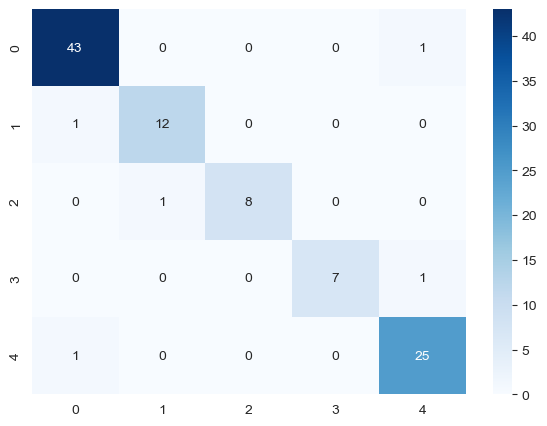

In [85]:
plt.figure(figsize=(7,5))
sns.heatmap(cm1, cmap="Blues", annot=True)

In [86]:
from sklearn.metrics import precision_score,recall_score, f1_score
pre = precision_score(y_train,y_pred1, average="macro")
rec = recall_score(y_train, y_pred1, average="macro")
f1 = f1_score(y_train,y_pred1, average="macro")

print("Precision Score : ",pre)
print("Recall Score : ",rec)
print("F1 Score : ",f1)

y_score = cross_val_predict(sgdc,X_train_new,y_train,cv=3)

Precision Score :  0.9609116809116809
Recall Score :  0.9251554001554002
F1 Score :  0.9414550176490094


Accuracy: 0.82
Precision: 0.7741952090339188
Recall: 0.846048632218845
F1 Score: 0.7953169064235863
Confusion Matrix:
[[36  1  3  0  7]
 [ 0 10  0  0  0]
 [ 0  1  6  0  0]
 [ 0  2  0  6  0]
 [ 1  1  1  1 24]]


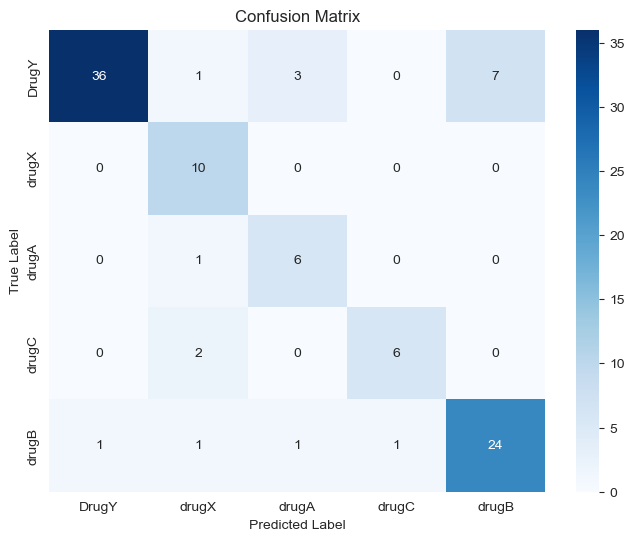

In [88]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors=3)  
knn_classifier.fit(X_train_new, y_train)
y_pred = knn_classifier.predict(X_test_new)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
conf_matrix = confusion_matrix(y_test, y_pred)
class_labels = ['DrugY', 'drugX', 'drugA', 'drugC', 'drugB']
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(conf_matrix)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()